# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [3]:
# sampling
Y_generative = np.repeat([1,-1],500)
X_generative = np.concatenate([np.random.multivariate_normal(m1, sigma, 500),np.random.multivariate_normal(m2, sigma, 500)], axis=0)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

$$p(y=1|x)=\frac{p(x|y=1)p(y=1)}{p(x)}$$
$$p(x)=p(x|y=1)p(y=1)+p(x|y=-1)p(y=-1)$$

**ANSWER: yes**

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

$$\beta_0=log\frac{\pi}{1-\pi}+\frac{1}{2} * m_2\Sigma^{-1}m_2-\frac{1}{2} * m_1\Sigma^{-1}m_1$$
$$\beta=\Sigma^{-1}(m_1-m_2)$$

In [4]:
# computing beta_0 and beta using the formulas
print(f"beta_0={np.log(0.5/(1-0.5))+1/2*m2@np.linalg.inv(sigma)@m2-1/2*m1@np.linalg.inv(sigma)@m1}")
print(f"beta={np.linalg.inv(sigma)@(m1-m2)}")

beta_0=-2.0
beta=[2. 2.]


In [5]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-1.98722156]), array([[1.97569867, 2.04926049]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [14]:
# sampling
X1_discriminative = np.random.multivariate_normal(m1, sigma, 1000)
X2_discriminative = np.random.multivariate_normal(m2, sigma, 1000)
mixture = np.random.binomial(1, 0.5, size=(1000,1))
X_discriminative = X1_discriminative*mixture + X2_discriminative*(1-mixture)
beta_0 = -2
beta = np.array(((2,2)))
prob = 1/(1+np.exp(-beta_0-beta@X_discriminative.T))
Y_discriminative = np.random.binomial(1, prob, 1000)*2-1

In [15]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)

LogisticRegression(penalty=None)

In [16]:
(mod_b.intercept_, mod_b.coef_)

(array([-2.02867985]), array([[2.04418143, 2.05011816]]))

#### Second bullet point

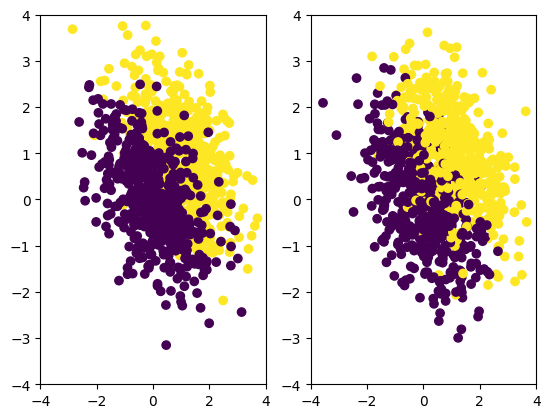

In [17]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0],X_generative[:,1],c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0],X_discriminative[:,1],c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

**ANSWER: nothing, due to same joint distributions**

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

**It is exponential distribution with parameter $\lambda$=2**

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

In [18]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [19]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.37819299]), array([[0.98906871]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

**Q2: Once $\pi$ is fixed, we do not have freedom to choose intercept.**

**Q3: Intercept depends on $\pi$.**

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [22]:
# a numeric answer to the question about beta0
pi_c = n1 / (n1 + n2)
beta0 = -np.log((1 - pi_c)/pi_c * (beta1 + 1))
beta0

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)